In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [7]:
print(customers.info())
print(products.describe())
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


**EXPLORATORY DATA ANALYSIS**

In [10]:
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [11]:
print("EDA Insights:")
total_sales = merged_data["TotalValue"].sum()
print(f"Total Sales: ${total_sales}")


EDA Insights:
Total Sales: $689995.56


In [12]:
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Quantity Sold:")
print(top_products)

top_regions = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("Top Regions by Sales:")
print(top_regions)


Top 5 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64
Top Regions by Sales:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [13]:
most_frequent_customers = merged_data.groupby("CustomerID")["TransactionID"].count().sort_values(ascending=False).head(5)
print("Most Frequent Customers:")
print(most_frequent_customers)

average_transaction_value = merged_data["TotalValue"].mean()
print(f"Average Transaction Value: ${average_transaction_value:.2f}")

Most Frequent Customers:
CustomerID
C0156    11
C0109    11
C0175    10
C0141    10
C0065    10
Name: TransactionID, dtype: int64
Average Transaction Value: $690.00


In [50]:
missing = merged_data.isnull().sum()
print(f'Missing values:\n{missing}')

Missing values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


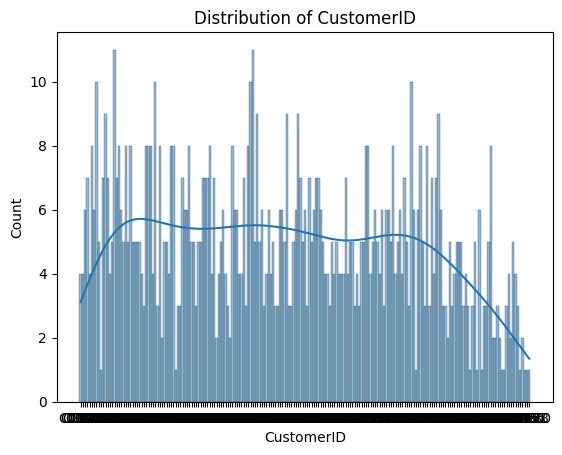

In [56]:
sns.histplot(merged_data['CustomerID'], kde=True)
plt.title('Distribution of CustomerID')
plt.show()



**LOOKALIKE MODEL**

In [20]:
customer_product_matrix = merged_data.pivot_table(index="CustomerID", columns="ProductName", values="Quantity", aggfunc="sum", fill_value=0)
print(customer_product_matrix)



ProductName  ActiveWear Biography  ActiveWear Cookbook  \
CustomerID                                               
C0001                           0                    0   
C0002                           0                    0   
C0003                           0                    0   
C0004                           0                    0   
C0005                           0                    0   
...                           ...                  ...   
C0196                           0                    0   
C0197                           0                    0   
C0198                           0                    0   
C0199                           0                    0   
C0200                           0                    0   

ProductName  ActiveWear Cookware Set  ActiveWear Headphones  \
CustomerID                                                    
C0001                              0                      0   
C0002                              0                    

In [22]:
similarity_matrix = cosine_similarity(customer_product_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_product_matrix.index, columns=customer_product_matrix.index)
similarity_df.head()



CustomerID,C0001,C0002,C0003,C0004,C0005,C0006,C0007,C0008,C0009,C0010,...,C0191,C0192,C0193,C0194,C0195,C0196,C0197,C0198,C0199,C0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,1.000000,0.0,0.206559,0.210819,0.000000,0.0,0.286446,0.101274,0.210819,0.000000,...,0.123443,0.000000,0.156492,0.469668,0.000000,0.0,0.135613,0.0,0.438178,0.0
C0002,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.262071,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.194461,0.105851,0.0,0.000000,0.0,0.000000,0.0
C0003,0.206559,0.0,1.000000,0.359258,0.308697,0.0,0.110940,0.313786,0.326599,0.000000,...,0.095618,0.000000,0.000000,0.291043,0.000000,0.3,0.000000,0.0,0.169706,0.0
C0004,0.210819,0.0,0.359258,1.000000,0.168034,0.0,0.362329,0.048038,0.266667,0.149854,...,0.078072,0.000000,0.049487,0.316847,0.000000,0.0,0.000000,0.0,0.092376,0.0
C0005,0.000000,0.0,0.308697,0.168034,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.325396,0.000000,0.083189,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [25]:
lookalike_results = {}
for customer_id in customer_product_matrix.index[:20]:  # First 20 customers
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:4]
    lookalike_results[customer_id] = [(idx, round(score, 2)) for idx, score in similar_customers.items()]
    print(customer_product_matrix.index[:20])



Index(['C0001', 'C0002', 'C0003', 'C0004', 'C0005', 'C0006', 'C0007', 'C0008',
       'C0009', 'C0010', 'C0011', 'C0012', 'C0013', 'C0014', 'C0015', 'C0016',
       'C0017', 'C0018', 'C0019', 'C0020'],
      dtype='object', name='CustomerID')
Index(['C0001', 'C0002', 'C0003', 'C0004', 'C0005', 'C0006', 'C0007', 'C0008',
       'C0009', 'C0010', 'C0011', 'C0012', 'C0013', 'C0014', 'C0015', 'C0016',
       'C0017', 'C0018', 'C0019', 'C0020'],
      dtype='object', name='CustomerID')
Index(['C0001', 'C0002', 'C0003', 'C0004', 'C0005', 'C0006', 'C0007', 'C0008',
       'C0009', 'C0010', 'C0011', 'C0012', 'C0013', 'C0014', 'C0015', 'C0016',
       'C0017', 'C0018', 'C0019', 'C0020'],
      dtype='object', name='CustomerID')
Index(['C0001', 'C0002', 'C0003', 'C0004', 'C0005', 'C0006', 'C0007', 'C0008',
       'C0009', 'C0010', 'C0011', 'C0012', 'C0013', 'C0014', 'C0015', 'C0016',
       'C0017', 'C0018', 'C0019', 'C0020'],
      dtype='object', name='CustomerID')
Index(['C0001', 'C0002', 'C0

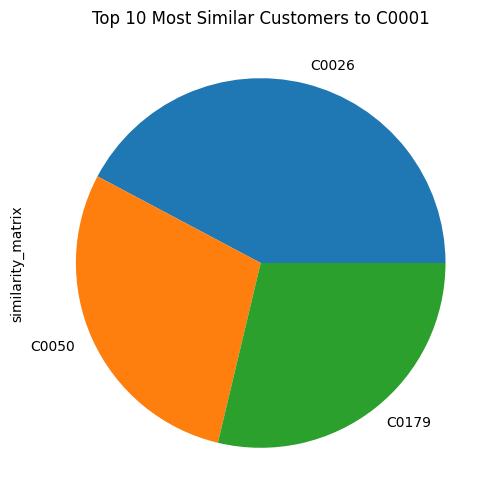

In [60]:
plt.figure(figsize=(10, 6))
similar_customers.head(10).plot(kind='pie', color='green')
plt.title("Top 10 Most Similar Customers to C0001")
plt.ylabel("similarity_matrix")
plt.show()

In [27]:
lookalike_df = pd.DataFrame.from_dict(lookalike_results, orient="index", columns=["Lookalike 1", "Lookalike 2", "Lookalike 3"])
lookalike_df.to_csv("Ayushi_Tamboli_Lookalike.csv")
print("Lookalike Model results saved to Ayushi_Tamboli_Lookalike.csv")


Lookalike Model results saved to Ayushi_Tamboli_Lookalike.csv


**CUSTOMER CLUSTERING**

In [19]:
customer_summary = merged_data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    total_quantity=("Quantity", "sum"),
    transaction_count=("TransactionID", "count")
)
print(customer_summary)


            total_spent  total_quantity  transaction_count
CustomerID                                                
C0001           3354.52              12                  5
C0002           1862.74              10                  4
C0003           2725.38              14                  4
C0004           5354.88              23                  8
C0005           2034.24               7                  3
...                 ...             ...                ...
C0196           4982.88              12                  4
C0197           1928.65               9                  3
C0198            931.83               3                  2
C0199           1979.28               9                  4
C0200           4758.60              16                  5

[199 rows x 3 columns]


In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary)
scaled_data




array([[-0.06170143, -0.12203296, -0.01145819,  0.24770536],
       [-0.87774353, -0.44800021, -0.46749414, -0.53472903],
       [-0.40585722,  0.20393428, -0.46749414,  0.24770536],
       [ 1.03254704,  1.67078689,  1.35664965,  1.03013974],
       [-0.78392861, -0.93695108, -0.92353008, -0.53472903],
       [ 0.41587942, -0.12203296, -0.46749414,  0.24770536],
       [-0.48548229, -0.77396745, -0.92353008, -0.53472903],
       [ 0.43997044,  1.18183602,  2.26872154,  1.03013974],
       [-1.40630171, -1.58888557, -0.92353008,  1.81257413],
       [-0.9571662 , -0.12203296, -0.46749414, -0.53472903],
       [ 0.14369581,  0.04095066, -0.01145819,  0.24770536],
       [ 0.96492372,  1.0188524 ,  0.9006137 , -1.31716341],
       [ 1.38575064,  0.85586877,  0.9006137 , -1.31716341],
       [-1.72239508, -1.75186919, -1.83560198,  1.81257413],
       [-1.26353893, -1.42590195, -1.37956603,  1.81257413],
       [ 0.22269727, -0.44800021, -0.01145819,  0.24770536],
       [ 0.70375173,  1.

In [39]:
kmeans = KMeans(n_clusters=5, random_state=43)  
clusters = kmeans.fit_predict(scaled_data)
print(clusters[:40])



[1 1 1 2 1 1 1 2 3 1 1 0 0 3 3 1 2 0 1 3 0 0 0 0 1 1 1 2 1 1 1 3 3 0 1 1 1
 1 0 1]


In [40]:
customer_summary["Cluster"] = clusters

In [41]:
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")



Davies-Bouldin Index: 0.76


In [44]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)



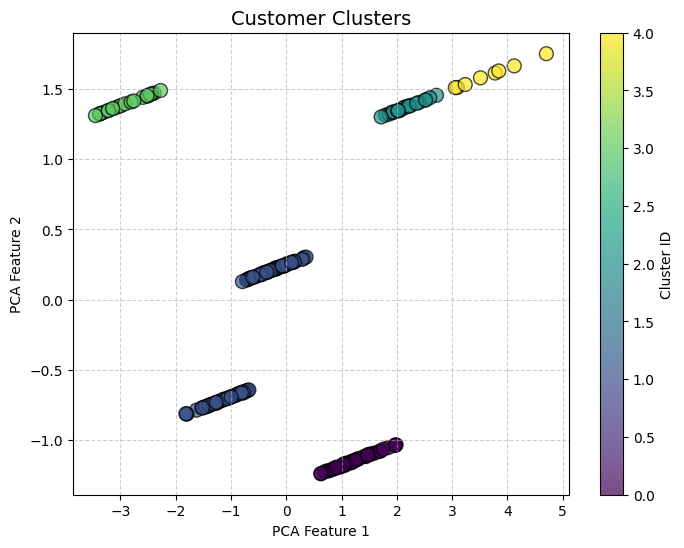

In [45]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="viridis", s=100, edgecolor="k", alpha=0.7)
plt.colorbar(scatter, label="Cluster ID")
plt.title("Customer Clusters", fontsize=14)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [46]:
customer_summary.to_csv("Ayushi_Tamboli_Clustering.csv")
print("Customer clustering results saved to Ayushi_Tamboli_Clustering.csv")

Customer clustering results saved to Ayushi_Tamboli_Clustering.csv
